In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

# Algoritmo
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor

# Metricas de evaluación
# ==============================================================================
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.simplefilter(action='ignore')

In [2]:
dataset_dir = 'Dataset_Final/Dataset_unido.csv' #Se carga el dataset
datos = pd.read_csv(dataset_dir, sep=(',')) #Se lee el archivo csv el cual está separado por comas
datos #Se imprime el dataset

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero,Incidencia
0,5,2020,1,12.9,24.149651,7.957837,46018.0,-12.489606,-8.493907,-11.392832,-9.280287,-5.809319,4.227240,0.00,2.0,0.000024
1,5,2020,2,25.2,22.286968,5.173339,46018.0,-67.037634,-44.896057,-55.349462,-62.886022,-50.243011,25.524731,0.00,2.0,0.000825
2,5,2020,3,20.0,22.739094,7.672982,46018.0,-50.040860,-28.913620,-39.594624,-51.555556,-34.839427,17.956272,0.00,2.0,0.026520
3,5,2020,4,15.2,23.157370,8.176094,46018.0,-28.945878,-3.579928,-27.370968,-28.567742,-19.315054,10.191756,0.00,2.0,0.033072
4,5,2021,1,17.9,22.285123,6.276447,52347.0,-32.214670,-0.670507,-31.100230,-34.711982,-20.892857,9.510369,0.66,2.0,0.024737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,88,2020,4,25.3,25.658387,0.000000,1027.0,-57.937993,-29.239427,-60.999642,-41.625090,-32.145878,13.854480,0.00,1.0,0.014034
188,88,2021,1,16.0,26.667411,0.000000,1300.0,-36.820661,-11.887865,-48.219662,-15.671659,-21.868280,9.530722,0.51,1.0,0.005350
189,88,2021,2,16.0,28.111204,0.000000,1300.0,-23.432616,-3.455914,-47.115412,-0.963082,-16.767384,11.880645,13.53,1.0,0.061390
190,88,2021,3,11.9,23.849370,0.000000,1300.0,1.812545,11.936918,-38.234050,31.749821,-7.212903,6.475986,56.77,1.0,0.006413


In [3]:
#Se separan las columnas para la evaluación
y = datos["Incidencia"] #Variable dependiente
X = datos.iloc[:,:-1] #Variables independientes
X

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero
0,5,2020,1,12.9,24.149651,7.957837,46018.0,-12.489606,-8.493907,-11.392832,-9.280287,-5.809319,4.227240,0.00,2.0
1,5,2020,2,25.2,22.286968,5.173339,46018.0,-67.037634,-44.896057,-55.349462,-62.886022,-50.243011,25.524731,0.00,2.0
2,5,2020,3,20.0,22.739094,7.672982,46018.0,-50.040860,-28.913620,-39.594624,-51.555556,-34.839427,17.956272,0.00,2.0
3,5,2020,4,15.2,23.157370,8.176094,46018.0,-28.945878,-3.579928,-27.370968,-28.567742,-19.315054,10.191756,0.00,2.0
4,5,2021,1,17.9,22.285123,6.276447,52347.0,-32.214670,-0.670507,-31.100230,-34.711982,-20.892857,9.510369,0.66,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,88,2020,4,25.3,25.658387,0.000000,1027.0,-57.937993,-29.239427,-60.999642,-41.625090,-32.145878,13.854480,0.00,1.0
188,88,2021,1,16.0,26.667411,0.000000,1300.0,-36.820661,-11.887865,-48.219662,-15.671659,-21.868280,9.530722,0.51,1.0
189,88,2021,2,16.0,28.111204,0.000000,1300.0,-23.432616,-3.455914,-47.115412,-0.963082,-16.767384,11.880645,13.53,1.0
190,88,2021,3,11.9,23.849370,0.000000,1300.0,1.812545,11.936918,-38.234050,31.749821,-7.212903,6.475986,56.77,1.0


In [4]:
# División de los datos en train 80% y test 20%
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 117)
# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(
            random_state = 329
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)


RandomForestRegressor(random_state=329)

In [5]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")
print("R2: ",r2_score(y_test,predicciones))

El error (rmse) de test es: 0.007915229617231359
R2:  0.7908843514969324


In [6]:
cv = KFold(n_splits=5) #Metodo de validación cruzada

#Evaluación del modelo con validación cruzada mediante la métrica R^2
scores = cross_val_score(modelo, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

#Se imprime el resultado de R^2 luego de la validación cruzada
print("R2 cv:", np.mean(scores)) 

R2 cv: 0.6061352657787028


Valor óptimo de n_estimators: 126


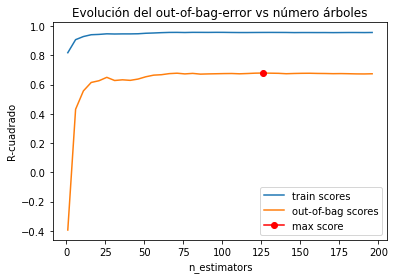

In [7]:
#Se halla el valor óptimo para el hiperparámetro n_estimators para la métrica R^2

# División de los datos en train 80% y test 20%
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 117)
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 200, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    #Se crea el modelo
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                oob_score    = True,
                random_state = 329
             )
    modelo.fit(X_train, y_train) #Se entrena el modelo
    train_scores.append(modelo.score(X_train, y_train)) #Se almacenan los resultados para entrenamiento
    oob_scores.append(modelo.oob_score_) #Se almacenan los resultados obtenidos para Out-of-Bag
    
# Gráfico de los valores de n_estimators y su óptimo según la métrica R^2
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R-cuadrado")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

Valor óptimo de n_estimators: 181


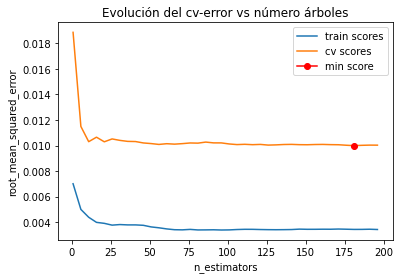

In [8]:
#Se halla el valor óptimo para el hiperparámetro n_estimators para la métrica RMSE

# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 200, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 329
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico de los valores de n_estimators y su óptimo según la métrica RMSE
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Valor óptimo de max_features: 9


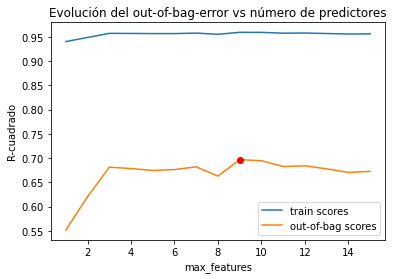

In [9]:
#Se halla el valor óptimo para el hiperparámetro max_features para la métrica R^2

# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 200,
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 329
             )
    modelo.fit(X_train, y_train) #Se entrena el modelo
    train_scores.append(modelo.score(X_train, y_train)) #Se almacena el puntaje obtenido para entrenamiento
    oob_scores.append(modelo.oob_score_) #Se almacena el puntaje obtenido para Out-of-Bag
    
# Gráfico de los valores de max_features y su óptimo según la métrica R^2
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R-cuadrado")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

Valor óptimo de max_features: 7


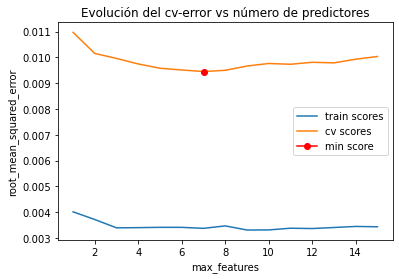

In [10]:
#Se halla el valor óptimo para el hiperparámetro max_features para la métrica RMSE

# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 200,
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 329
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico de los valores de max_features y su óptimo según la métrica RMSE
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

In [11]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': range(50, 200, 5),
                 'max_features': range(1, 10, 1),
                 'max_depth'   : range(1, 20, 2)
                }
             )

# Se crea un ciclo for para ajustar el modelo con cada combinación de hiperparámetros
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 329,
                ** params
             )
    
    mol = modelo.fit(X_train, y_train) #Se entrena el modelo
    
    resultados['params'].append(params) #Se almacena los resultados para este hiperparámetro
    resultados['oob_r2'].append(modelo.oob_score_) #Se almacena los resultados para este hiperparámetro

# Se imprime la tabla con los mejores resultados
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

,oob_r2,max_depth,max_features,n_estimators
784,0.706507,5,9,70
2153,0.703199,15,9,165
2152,0.702576,15,9,160
2154,0.701839,15,9,170


In [12]:
#Se crea un modelo con los mejores parámetros
model_n = RandomForestRegressor(max_depth=5,
                                max_features=9,
                                n_estimators=70,
                               random_state=329)
model_n

RandomForestRegressor(max_depth=5, max_features=9, n_estimators=70,
                      random_state=329)

In [13]:
model = model_n.fit(X_train,y_train) #Se entrena el modelo
predicciones = model_n.predict(X = X_test) #Se evalua el modelo

#Se calculo la métrica RMSE
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )

#Se imprime los resultados para las métricas RMSE y R^2
print(f"El error (rmse) de test es: ", rmse)
print("R2: ",r2_score(y_test,predicciones))

El error (rmse) de test es:  0.00791809168441742
R2:  0.7907330959374728


In [14]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-r2)")
print("--------------------------------------------")
print(resultados.iloc[0,0], ":", resultados.iloc[0,:]['oob_r2'], "R2")

--------------------------------------------
Mejores hiperparámetros encontrados (oob-r2)
--------------------------------------------
0.7065071832604204 : 0.7065071832604204 R2


In [15]:
# Grid de hiperparámetros evaluados
param_grid = {'n_estimators': range(50, 200, 5),
                 'max_features': range(3, 10, 1),
                 'max_depth'   : range(1, 15, 2)
             }

# Búsqueda por GridSearch con validación cruzada
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 329),
        param_grid = param_grid, #Hiperparámetros a variar
        scoring    = 'r2', #Métrica a calcular
        cv         = KFold(n_splits=5), #Método de validación cruzada
        refit      = True, #Reajusta el estimador con los mejores parámetros encontrados
        return_train_score = True #Calcula la exactitud del conjunto de datos de entrenamiento
       )

grid.fit(X = X_train, y = y_train) #Se entrena el modelo

# Se imprime la tabla con los mejores parámetros
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
1395,13,7,125,0.663328,0.048617,0.953817,0.004058
1394,13,7,120,0.662530,0.047736,0.954294,0.003814
1393,13,7,115,0.662085,0.047236,0.953886,0.003786
537,5,6,185,0.662003,0.056971,0.898227,0.006803


In [16]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 13, 'max_features': 7, 'n_estimators': 125} : 0.6633283372411987 r2


In [17]:
modelo_final = grid.best_estimator_ #Se obtiene el mejor estimador
modelo_final

RandomForestRegressor(max_depth=13, max_features=7, n_estimators=125,
                      random_state=329)

In [18]:
# Error de test del modelo final
# ==============================================================================
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
#Se imprimen los resultados para las métrica RMSE y R^2
print(f"El error (rmse) de test es: ",rmse)
print("R2: ",r2_score(y_test,predicciones))

El error (rmse) de test es:  0.0076917036934421755
R2:  0.8025284258502381


In [19]:
#Se imprime la importancia que tuvo en cuenta el modelo para cada columna
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "Incidencia").columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
13,PorcentajeVacunacion,0.200493
12,residential,0.195868
7,retail_and_recreation,0.137760
11,workplaces,0.102729
8,grocery_and_pharmacy,0.089317
9,parks,0.063697
3,PorcentajeDesempleo,0.034238
5,Precipitacion,0.032986
2,Trimestre,0.031703
4,Temperatura,0.031669
